In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_price = pd.read_csv(r'C:\Users\Xiang Fu\Desktop\Kaggle\m5-forecasting-accuracy\sell_prices.csv')
df_price.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [3]:
df_price.tail()

,store_id,item_id,wm_yr_wk,sell_price
6841116,WI_3,FOODS_3_827,11617,1.0
6841117,WI_3,FOODS_3_827,11618,1.0
6841118,WI_3,FOODS_3_827,11619,1.0
6841119,WI_3,FOODS_3_827,11620,1.0
6841120,WI_3,FOODS_3_827,11621,1.0


In [4]:
df_price[['State','Number']] = pd.DataFrame(df_price.store_id.str.split('_', 1).tolist())

In [5]:
df_price[['item_type','item_NO','id']] = pd.DataFrame(df_price.item_id.str.split('_', 2).tolist())

In [6]:
df_price.head(20)

,store_id,item_id,wm_yr_wk,sell_price,State,Number,item_type,item_NO,id
0,CA_1,HOBBIES_1_001,11325,9.58,CA,1,HOBBIES,1,001
1,CA_1,HOBBIES_1_001,11326,9.58,CA,1,HOBBIES,1,001
2,CA_1,HOBBIES_1_001,11327,8.26,CA,1,HOBBIES,1,001
3,CA_1,HOBBIES_1_001,11328,8.26,CA,1,HOBBIES,1,001
4,CA_1,HOBBIES_1_001,11329,8.26,CA,1,HOBBIES,1,001
5,CA_1,HOBBIES_1_001,11330,8.26,CA,1,HOBBIES,1,001
6,CA_1,HOBBIES_1_001,11331,8.26,CA,1,HOBBIES,1,001
7,CA_1,HOBBIES_1_001,11332,8.26,CA,1,HOBBIES,1,001
8,CA_1,HOBBIES_1_001,11333,8.26,CA,1,HOBBIES,1,001
9,CA_1,HOBBIES_1_001,11334,8.26,CA,1,HOBBIES,1,001


In [7]:
df_price_2 = df_price.copy()

In [8]:
# I want to encode same items for each store
from sklearn import preprocessing

item_encoder = preprocessing.LabelEncoder()
item_fit = item_encoder.fit(df_price['item_id'].unique())
df_price.iloc[:,1] = item_fit.transform(df_price.iloc[:,1])

In [9]:
df_CA_price = df_price[(df_price['State'] == 'CA')].copy()
df_CA_price_2 = df_price_2[(df_price_2['State'] == 'CA')].copy()

df_TX_price = df_price[(df_price['State'] == 'TX')].copy()
df_TX_price_2 = df_price_2[(df_price_2['State'] == 'TX')].copy()

df_WI_price = df_price[(df_price['State'] == 'WI')].copy()
df_WI_price_2 = df_price_2[(df_price_2['State'] == 'WI')].copy()

In [10]:
df_CA_price.tail()

,store_id,item_id,wm_yr_wk,sell_price,State,Number,item_type,item_NO,id
2708817,CA_4,1436,11617,1.0,CA,4,FOODS,3,827
2708818,CA_4,1436,11618,1.0,CA,4,FOODS,3,827
2708819,CA_4,1436,11619,1.0,CA,4,FOODS,3,827
2708820,CA_4,1436,11620,1.0,CA,4,FOODS,3,827
2708821,CA_4,1436,11621,1.0,CA,4,FOODS,3,827


In [11]:
df_TX_price.tail()

,store_id,item_id,wm_yr_wk,sell_price,State,Number,item_type,item_NO,id
4800939,TX_3,1436,11617,1.0,TX,3,FOODS,3,827
4800940,TX_3,1436,11618,1.0,TX,3,FOODS,3,827
4800941,TX_3,1436,11619,1.0,TX,3,FOODS,3,827
4800942,TX_3,1436,11620,1.0,TX,3,FOODS,3,827
4800943,TX_3,1436,11621,1.0,TX,3,FOODS,3,827


In [12]:
df_WI_price.tail()

,store_id,item_id,wm_yr_wk,sell_price,State,Number,item_type,item_NO,id
6841116,WI_3,1436,11617,1.0,WI,3,FOODS,3,827
6841117,WI_3,1436,11618,1.0,WI,3,FOODS,3,827
6841118,WI_3,1436,11619,1.0,WI,3,FOODS,3,827
6841119,WI_3,1436,11620,1.0,WI,3,FOODS,3,827
6841120,WI_3,1436,11621,1.0,WI,3,FOODS,3,827


In [13]:
CA_list = df_CA_price.iloc[:,:4].copy()

In [14]:
from sklearn import preprocessing
CA_store = preprocessing.LabelEncoder()
CA_store_fit = CA_store.fit(CA_list['store_id'].unique())
CA_list.iloc[:,0] = CA_store_fit.transform(CA_list.iloc[:,0])

In [15]:
CA_list['store_id'].value_counts(ascending=True)

1    637395
3    679025
2    693990
0    698412
Name: store_id, dtype: int64

In [16]:
CA_list['item_id'].value_counts(ascending=True)

462      142
593      143
908      163
2433     172
1214     222
        ... 
869     1128
868     1128
2915    1128
980     1128
2047    1128
Name: item_id, Length: 3049, dtype: int64

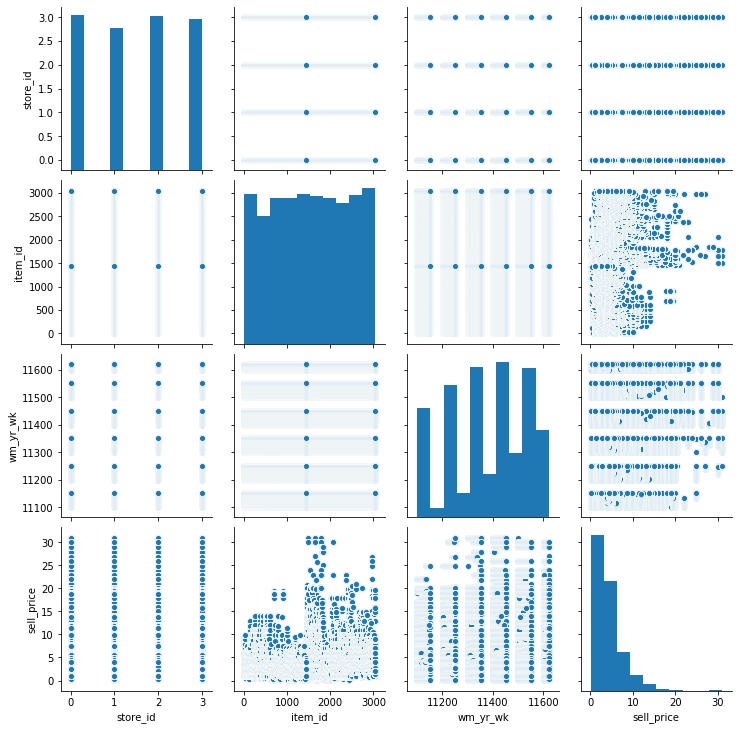

In [17]:
sns.pairplot(CA_list)

## Note:
* From figures of store_id, 4 stores have similar item numbers and price changes.
* From figures of sell_price, it changes with the time, and small values (1-10) are most frequent

## I need to find a time or period that the price could be in stable

In [19]:
CA_list.head()

,store_id,item_id,wm_yr_wk,sell_price
0,0,1437,11325,9.58
1,0,1437,11326,9.58
2,0,1437,11327,8.26
3,0,1437,11328,8.26
4,0,1437,11329,8.26


In [20]:
CA_list['sell_diff'] = CA_list.groupby(['store_id','item_id','store_id'])['sell_price'].diff()

In [21]:
CA_highest = CA_list.groupby(['store_id','item_id','store_id'])['sell_price'].transform("max")
CA_list['ratio'] = CA_list['sell_price'].div(CA_highest)
CA_list['ratio'] = CA_list['ratio'].round(2)

In [22]:
CA_list

,store_id,item_id,wm_yr_wk,sell_price,sell_diff,ratio
0,0,1437,11325,9.58,NaN,1.00
1,0,1437,11326,9.58,0.00,1.00
2,0,1437,11327,8.26,-1.32,0.86
3,0,1437,11328,8.26,0.00,0.86
4,0,1437,11329,8.26,0.00,0.86
...,...,...,...,...,...,...
2708817,3,1436,11617,1.00,0.00,1.00
2708818,3,1436,11618,1.00,0.00,1.00
2708819,3,1436,11619,1.00,0.00,1.00
2708820,3,1436,11620,1.00,0.00,1.00


In [23]:
# # I think the price could be round up to int 
# CA_list['sell_price'] = CA_list['sell_price'].round(0)
# CA_list['sell_price'] = CA_list['sell_price'].astype(int)

In [24]:
CA_list.head()

,store_id,item_id,wm_yr_wk,sell_price,sell_diff,ratio
0,0,1437,11325,9.58,NaN,1.00
1,0,1437,11326,9.58,0.00,1.00
2,0,1437,11327,8.26,-1.32,0.86
3,0,1437,11328,8.26,0.00,0.86
4,0,1437,11329,8.26,0.00,0.86


In [25]:
CA_list.item_id.unique().shape

(3049,)

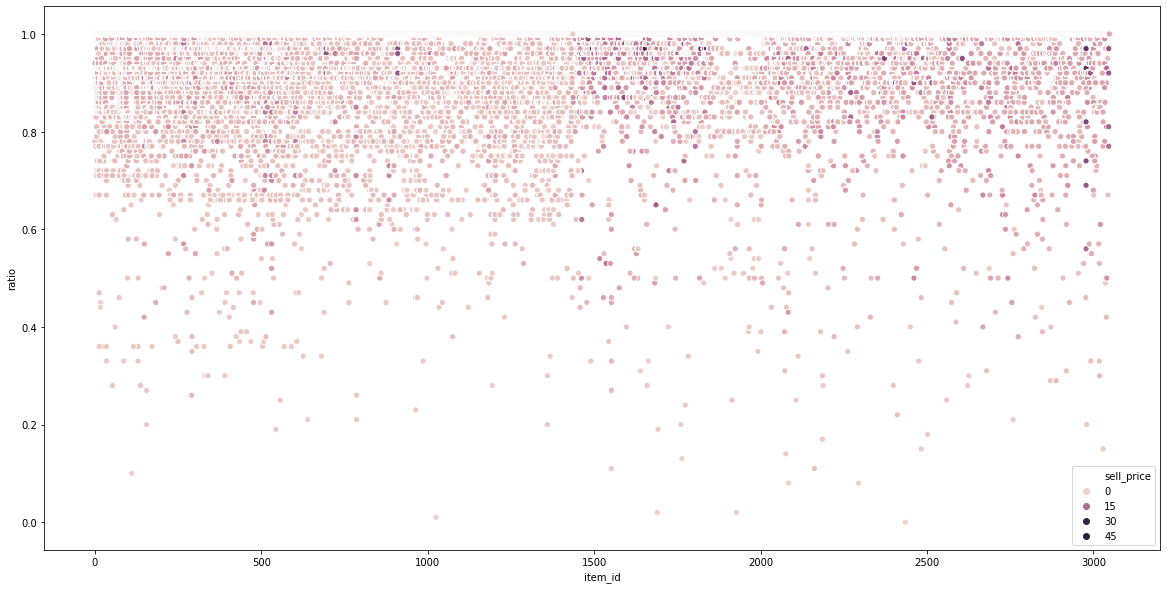

In [123]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'item_id', y = 'ratio', hue = 'sell_price', data = CA_list)

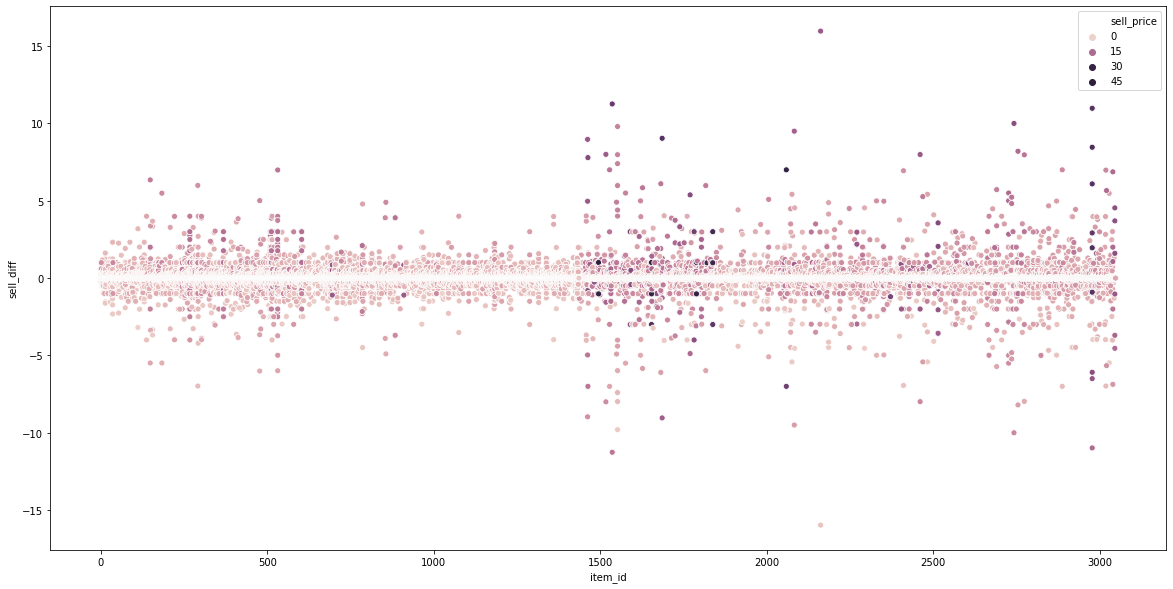

In [124]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'item_id', y = 'sell_diff', hue = 'sell_price', data = CA_list)

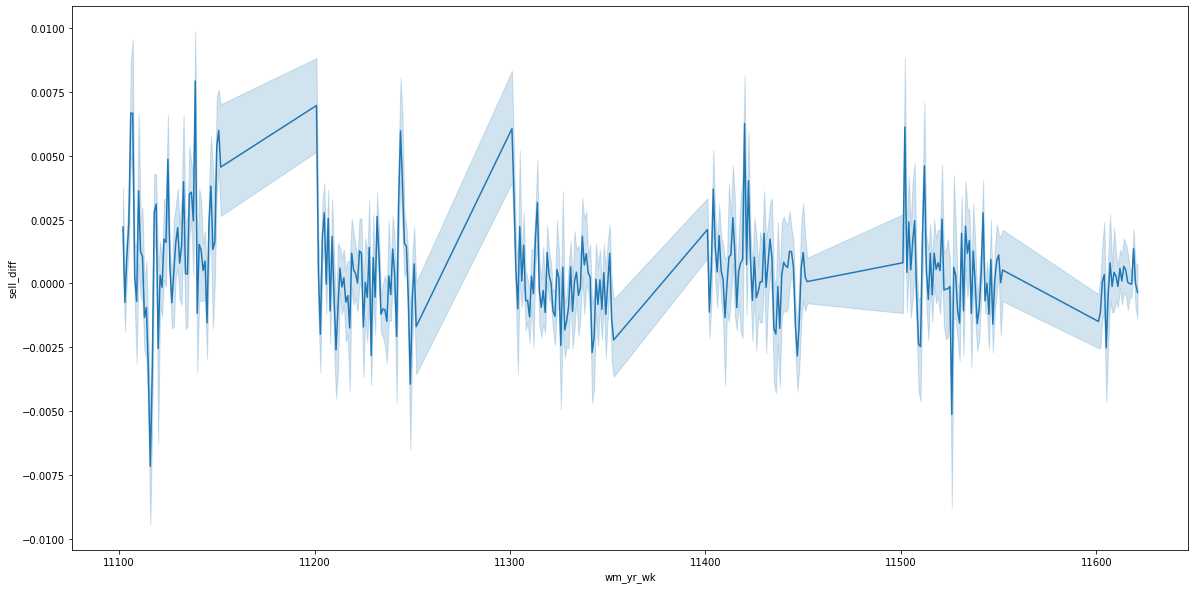

In [58]:
plt.figure(figsize = (20,10))
sns.lineplot(x = 'wm_yr_wk', y = 'sell_diff', data = CA_list)

* The 'sell_price' in the figure is the mean value and std for each week (wm_yr_wk)
* The period after 11400 ~ 11430 comes to be stable
* Price increase changed around 11500-11510

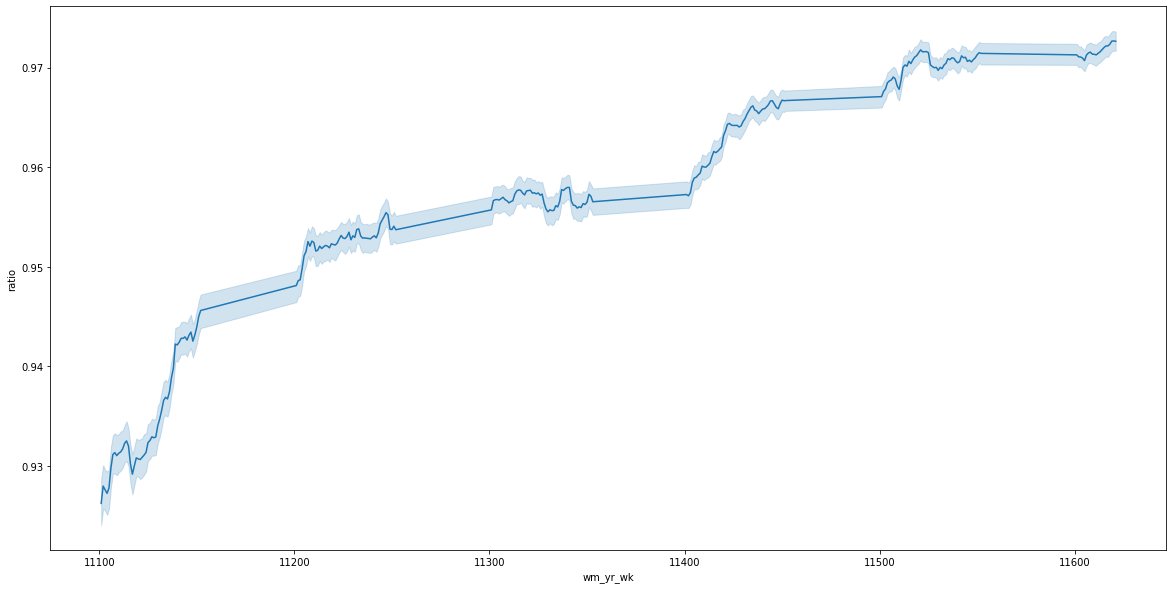

In [125]:
plt.figure(figsize = (20,10))
sns.lineplot(x = 'wm_yr_wk', y = 'ratio', data = CA_list)

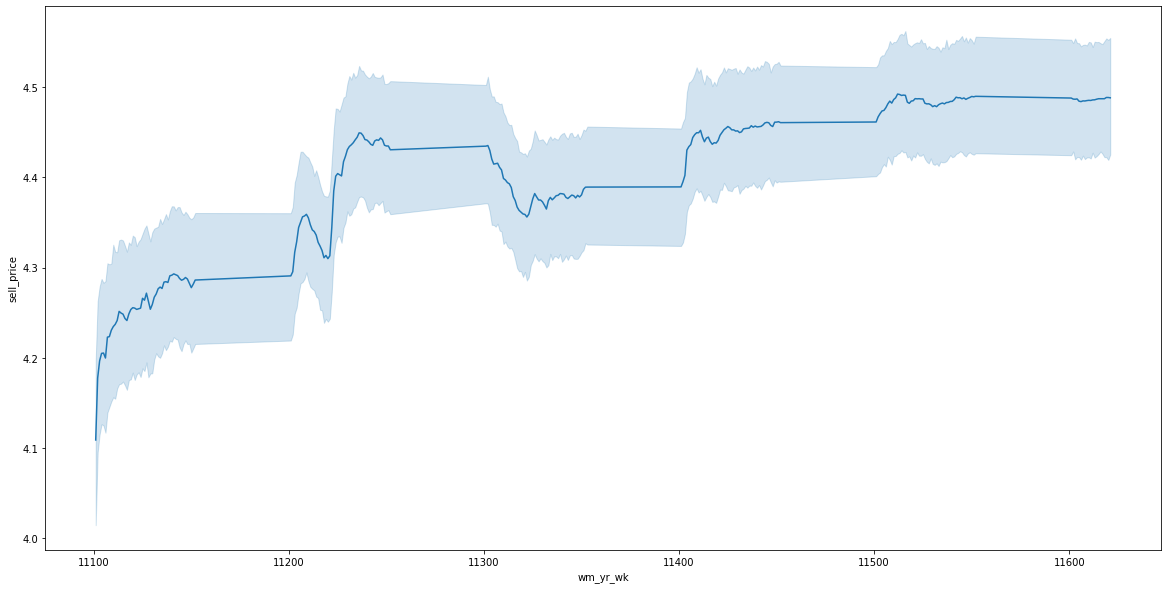

In [59]:
plt.figure(figsize = (20,10))
sns.lineplot(x = 'wm_yr_wk', y = 'sell_price', data = CA_list)

* this figure could tell me what items have theri pirce changes

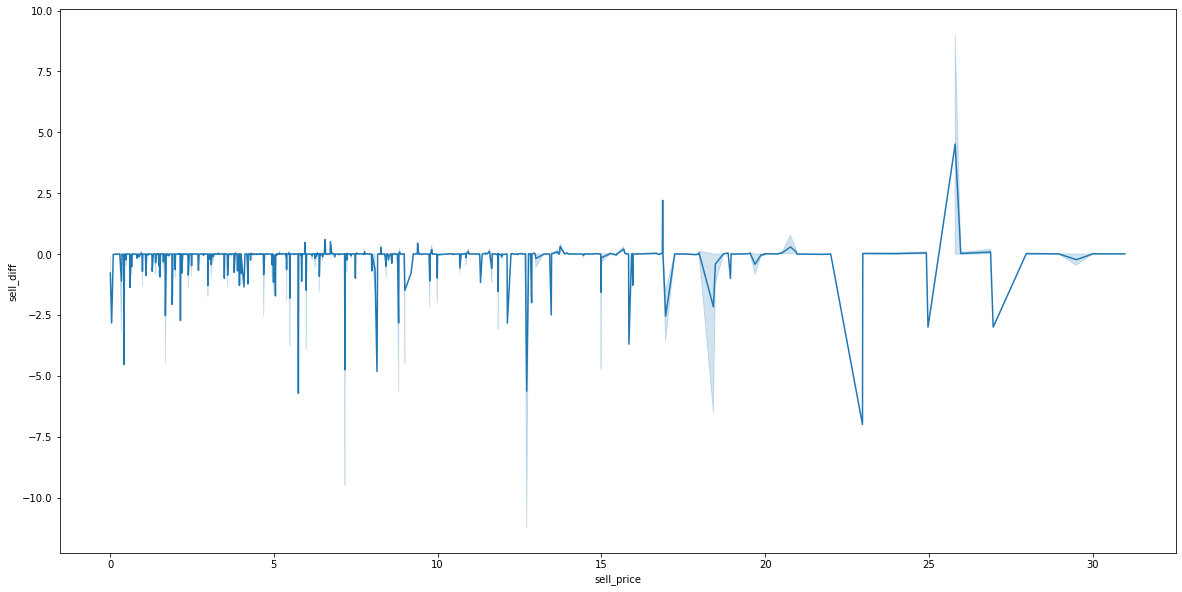

In [60]:
plt.figure(figsize = (20,10))
sns.lineplot(x = 'sell_price', y = 'sell_diff', data = CA_list)

## Primary Prediction for CA:
* The trend before 11250 is too low
* The trend after 11500 have a big drop (frequency) for some items
* The trends in 11420-11600 could be nice time period for training
* The higher price , the more changes on prices, I prefer to split it into 
* 0-1000, 1001-1450, 1451- 2000, 2000-2900, 2901-3000, 3001-3049

In [26]:
CA_list['train_id'] = CA_list['item_id']
CA_list['store_id'] = df_CA_price_2['store_id']
CA_list['item_id'] = df_CA_price_2['item_id']

In [28]:
CA_list.to_csv(r'C:\Users\Xiang Fu\Desktop\Kaggle\m5-forecasting-accuracy\sell_price_ca.csv',index = False)

## Store of TX and WI

In [29]:
TX_list = df_TX_price.iloc[:,:4].copy()
WI_list = df_WI_price.iloc[:,:4].copy()

In [30]:
TX_list['sell_diff'] = TX_list.groupby(['store_id','item_id','store_id'])['sell_price'].diff()
WI_list['sell_diff'] = WI_list.groupby(['store_id','item_id','store_id'])['sell_price'].diff()

In [31]:
TX_highest = TX_list.groupby(['store_id','item_id','store_id'])['sell_price'].transform("max")
TX_list['ratio'] = TX_list['sell_price'].div(TX_highest)
TX_list['ratio'] = TX_list['ratio'].round(2)

WI_highest = WI_list.groupby(['store_id','item_id','store_id'])['sell_price'].transform("max")
WI_list['ratio'] = WI_list['sell_price'].div(WI_highest)
WI_list['ratio'] = WI_list['ratio'].round(2)

In [32]:
TX_list.tail()

,store_id,item_id,wm_yr_wk,sell_price,sell_diff,ratio
4800939,TX_3,1436,11617,1.0,0.0,1.0
4800940,TX_3,1436,11618,1.0,0.0,1.0
4800941,TX_3,1436,11619,1.0,0.0,1.0
4800942,TX_3,1436,11620,1.0,0.0,1.0
4800943,TX_3,1436,11621,1.0,0.0,1.0


In [33]:
WI_list.tail()

,store_id,item_id,wm_yr_wk,sell_price,sell_diff,ratio
6841116,WI_3,1436,11617,1.0,0.0,1.0
6841117,WI_3,1436,11618,1.0,0.0,1.0
6841118,WI_3,1436,11619,1.0,0.0,1.0
6841119,WI_3,1436,11620,1.0,0.0,1.0
6841120,WI_3,1436,11621,1.0,0.0,1.0


In [34]:
# TX_list['sell_price'] = TX_list['sell_price'].round(0)
# TX_list['sell_price'] = TX_list['sell_price'].astype(int)

# WI_list['sell_price'] = WI_list['sell_price'].round(0)
# WI_list['sell_price'] = WI_list['sell_price'].astype(int)

In [35]:
TX_store = preprocessing.LabelEncoder()
TX_store_fit = TX_store.fit(TX_list['store_id'].unique())
TX_list.iloc[:,0] = TX_store_fit.transform(TX_list.iloc[:,0])

WI_store = preprocessing.LabelEncoder()
WI_store_fit = WI_store.fit(WI_list['store_id'].unique())
WI_list.iloc[:,0] = WI_store_fit.transform(WI_list.iloc[:,0])

In [36]:
TX_list.tail()

,store_id,item_id,wm_yr_wk,sell_price,sell_diff,ratio
4800939,2,1436,11617,1.0,0.0,1.0
4800940,2,1436,11618,1.0,0.0,1.0
4800941,2,1436,11619,1.0,0.0,1.0
4800942,2,1436,11620,1.0,0.0,1.0
4800943,2,1436,11621,1.0,0.0,1.0


In [37]:
WI_list.tail()

,store_id,item_id,wm_yr_wk,sell_price,sell_diff,ratio
6841116,2,1436,11617,1.0,0.0,1.0
6841117,2,1436,11618,1.0,0.0,1.0
6841118,2,1436,11619,1.0,0.0,1.0
6841119,2,1436,11620,1.0,0.0,1.0
6841120,2,1436,11621,1.0,0.0,1.0


In [38]:
TX_list.item_id.unique().shape

(3049,)

In [39]:
WI_list.item_id.unique().shape

(3049,)

In [40]:
TX_list['train_id'] = TX_list['item_id']
TX_list['store_id'] = df_TX_price_2['store_id']
TX_list['item_id'] = df_TX_price_2['item_id']

WI_list['train_id'] = WI_list['item_id']
WI_list['store_id'] = df_WI_price_2['store_id']
WI_list['item_id'] = df_WI_price_2['item_id']

In [41]:
TX_list.to_csv(r'C:\Users\Xiang Fu\Desktop\Kaggle\m5-forecasting-accuracy\sell_price_tx.csv',index = False)
WI_list.to_csv(r'C:\Users\Xiang Fu\Desktop\Kaggle\m5-forecasting-accuracy\sell_price_wi.csv',index = False)

## TX

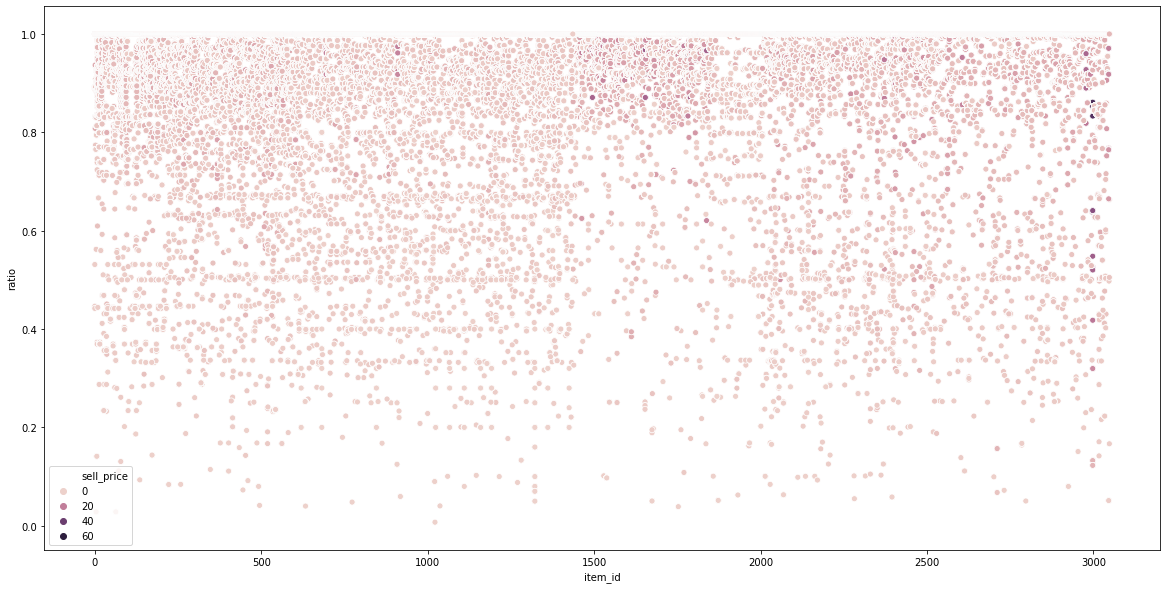

In [108]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'item_id', y = 'ratio', hue = 'sell_price', data = TX_list)

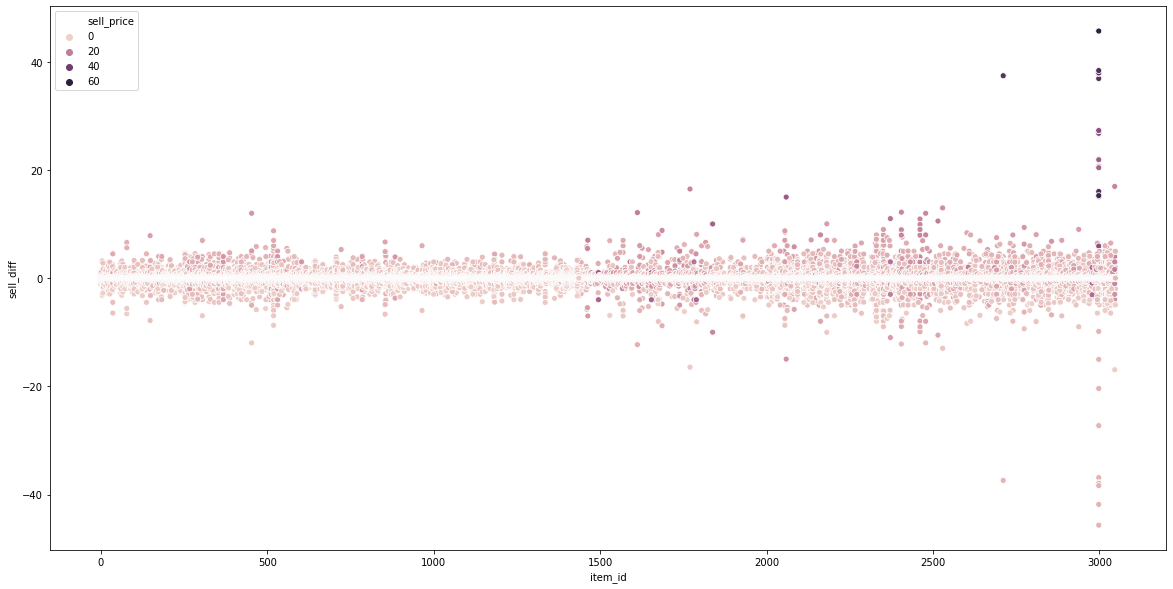

In [74]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'item_id', y = 'sell_diff', hue = 'sell_price', data = TX_list)

* 3000 is weird
* I prefer to split it into 
* 0-1450, 1451- 2000, 2000-2900, 2901-3000, 3001-3049

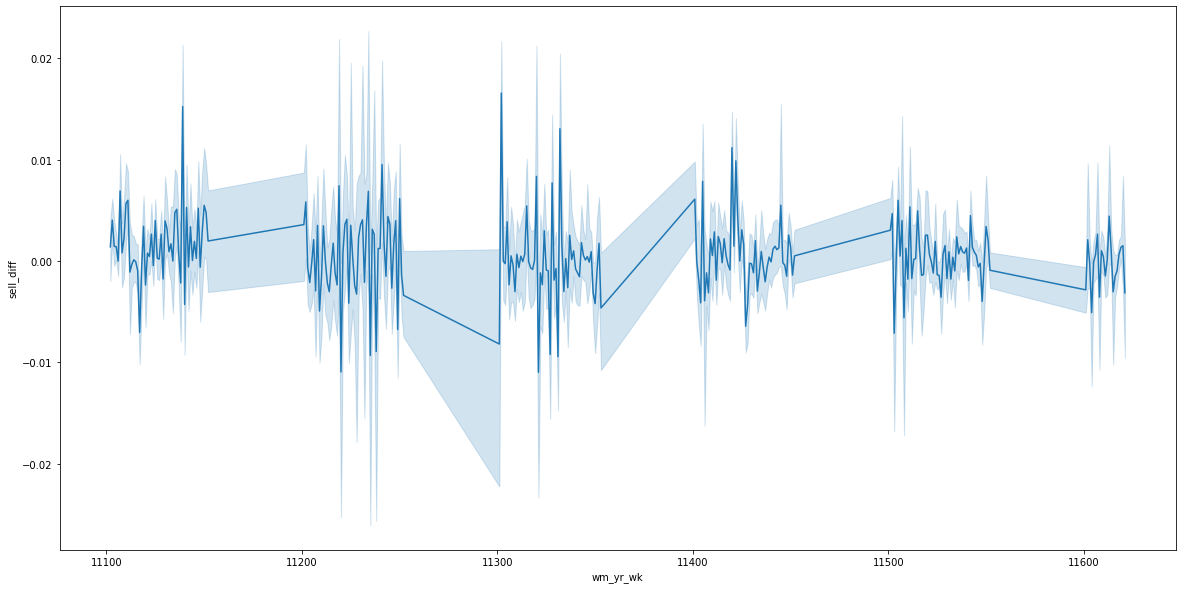

In [75]:
plt.figure(figsize = (20,10))
sns.lineplot(x = 'wm_yr_wk', y = 'sell_diff', data = TX_list)

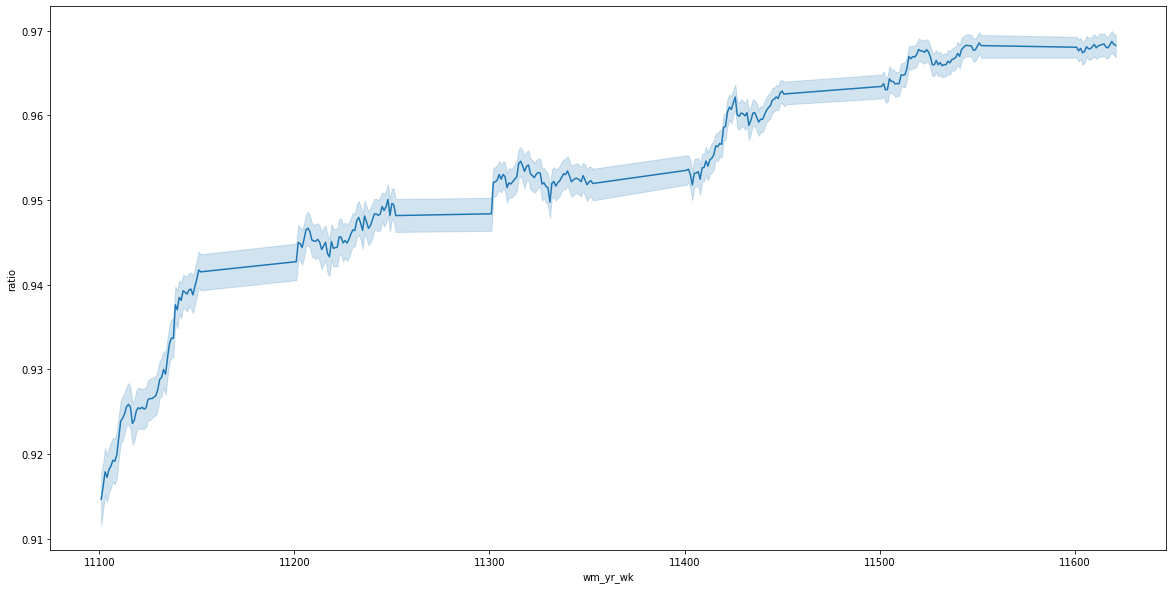

In [109]:
plt.figure(figsize = (20,10))
sns.lineplot(x = 'wm_yr_wk', y = 'ratio', data = TX_list)

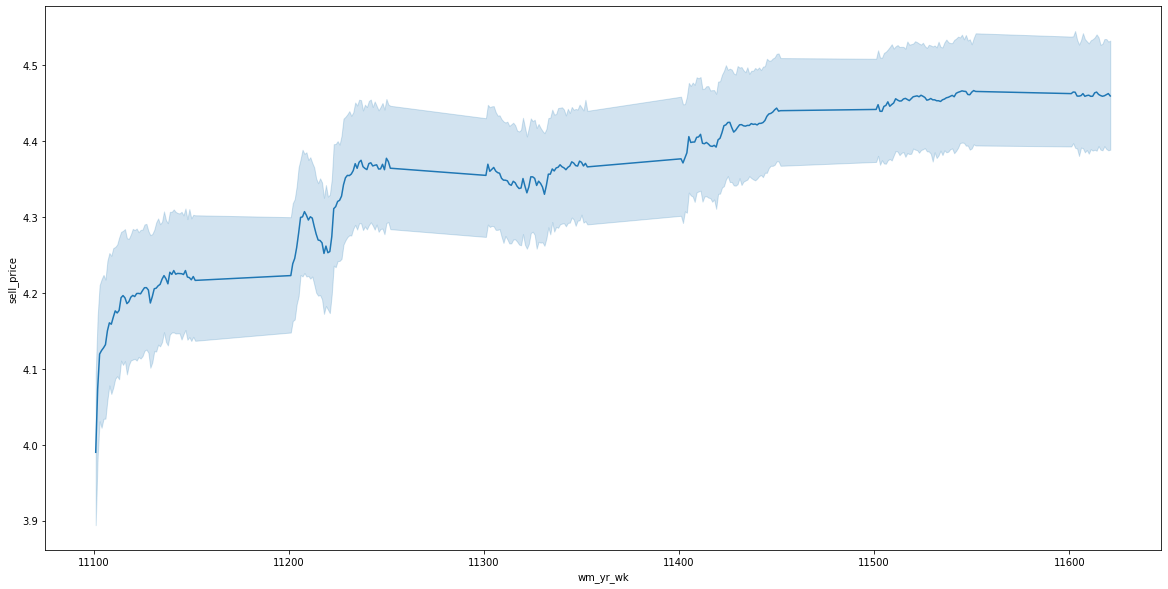

In [77]:
plt.figure(figsize = (20,10))
sns.lineplot(x = 'wm_yr_wk', y = 'sell_price', data = TX_list)

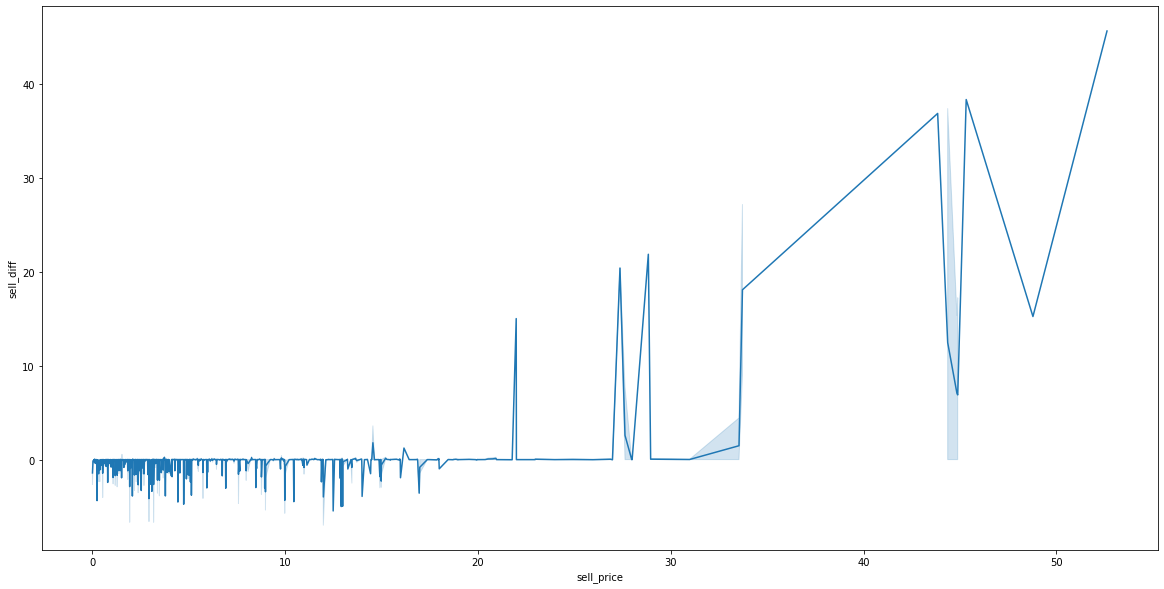

In [79]:
plt.figure(figsize = (20,10))
sns.lineplot(x = 'sell_price', y = 'sell_diff', data = TX_list)

## Conclusion TX:
* use week 11420- 11600 to train

## WI

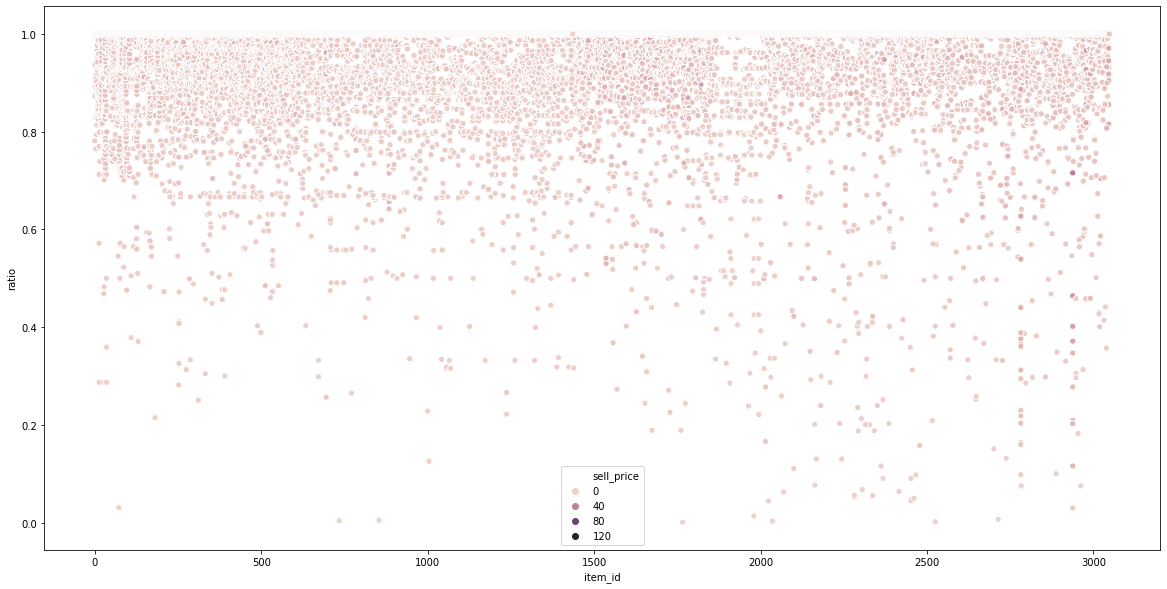

In [110]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'item_id', y = 'ratio', hue = 'sell_price', data = WI_list)

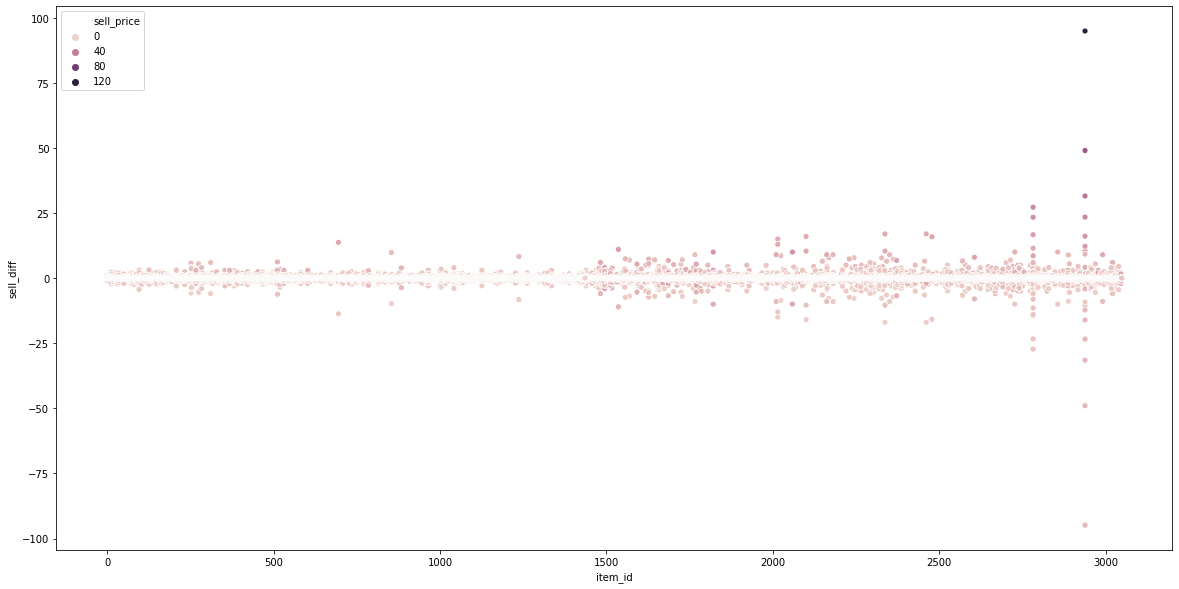

In [230]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'item_id', y = 'sell_diff', hue = 'sell_price', data = WI_list)

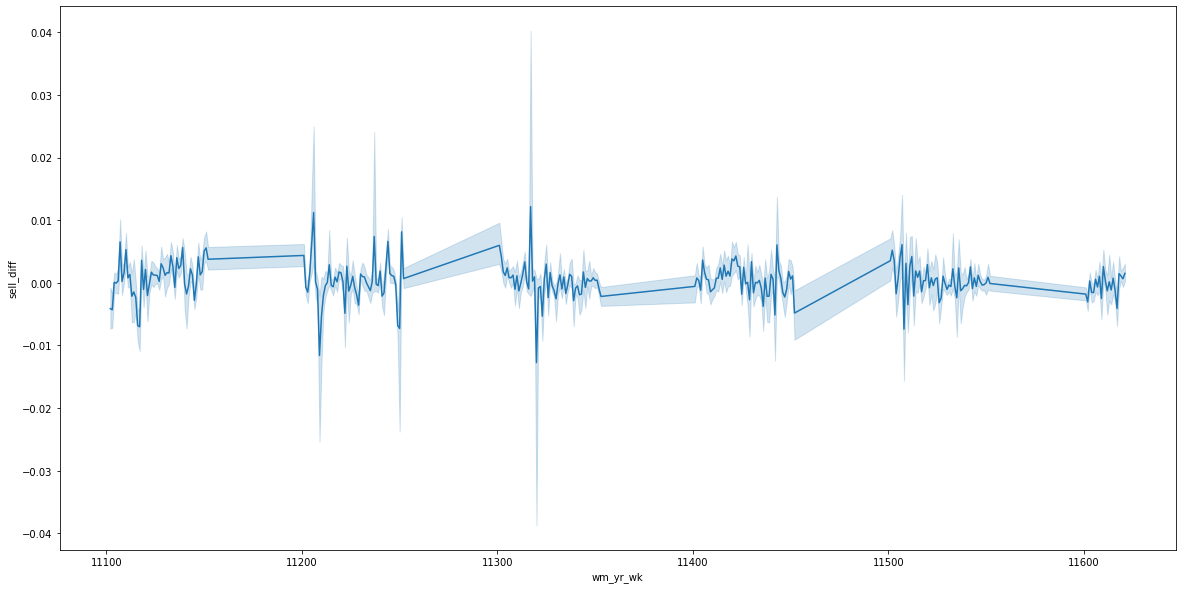

In [231]:
plt.figure(figsize = (20,10))
sns.lineplot(x = 'wm_yr_wk', y = 'sell_diff', data = WI_list)

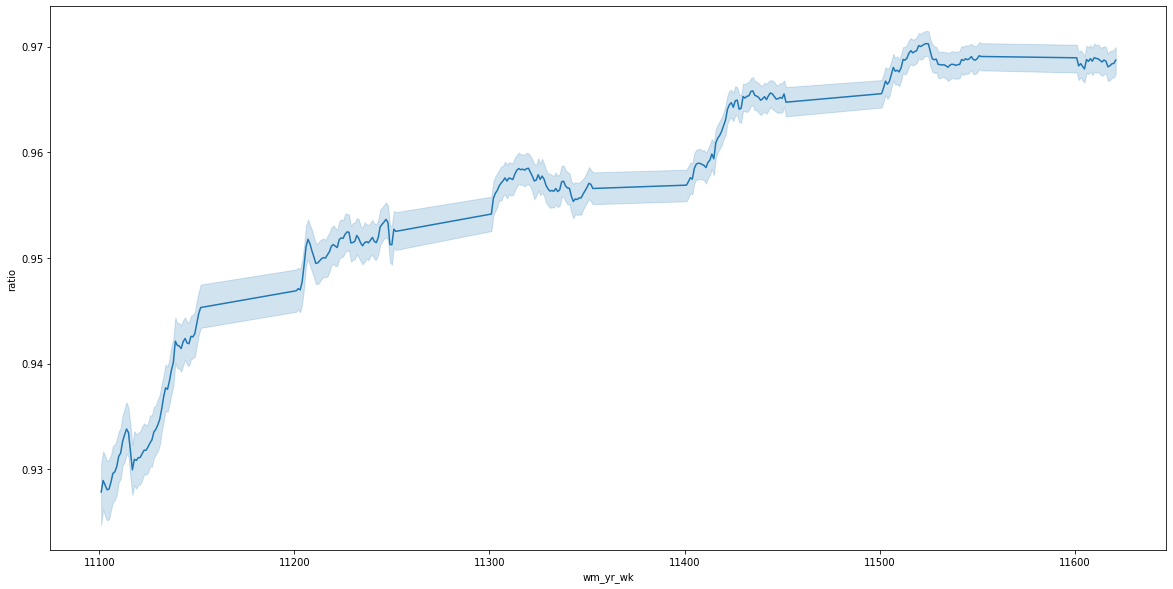

In [111]:
plt.figure(figsize = (20,10))
sns.lineplot(x = 'wm_yr_wk', y = 'ratio', data = WI_list)

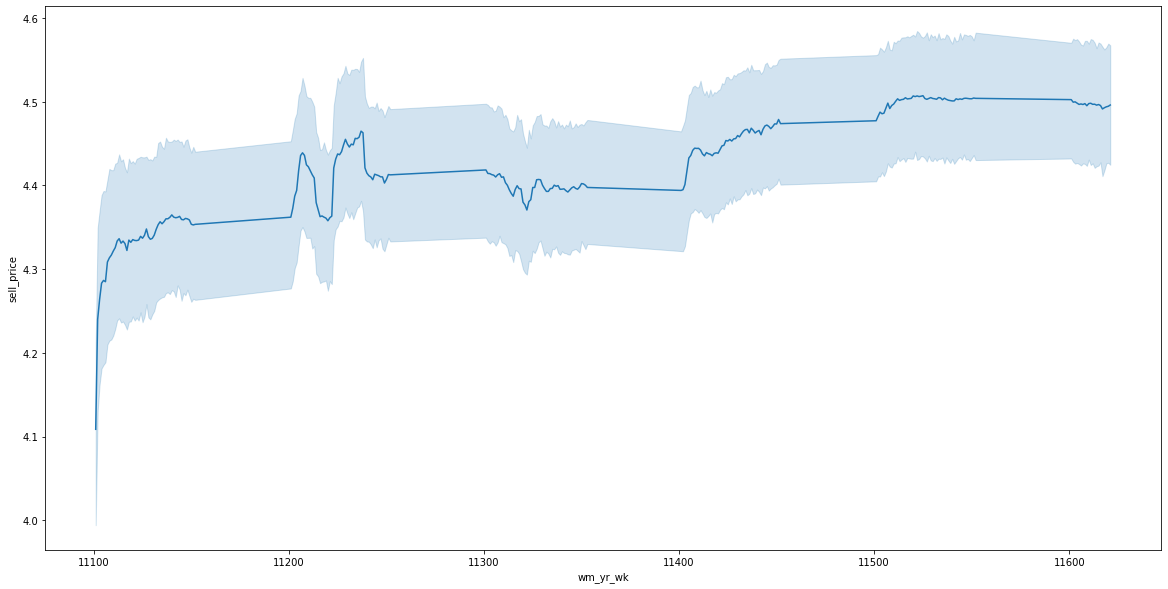

In [112]:
plt.figure(figsize = (20,10))
sns.lineplot(x = 'wm_yr_wk', y = 'sell_price', data = WI_list)

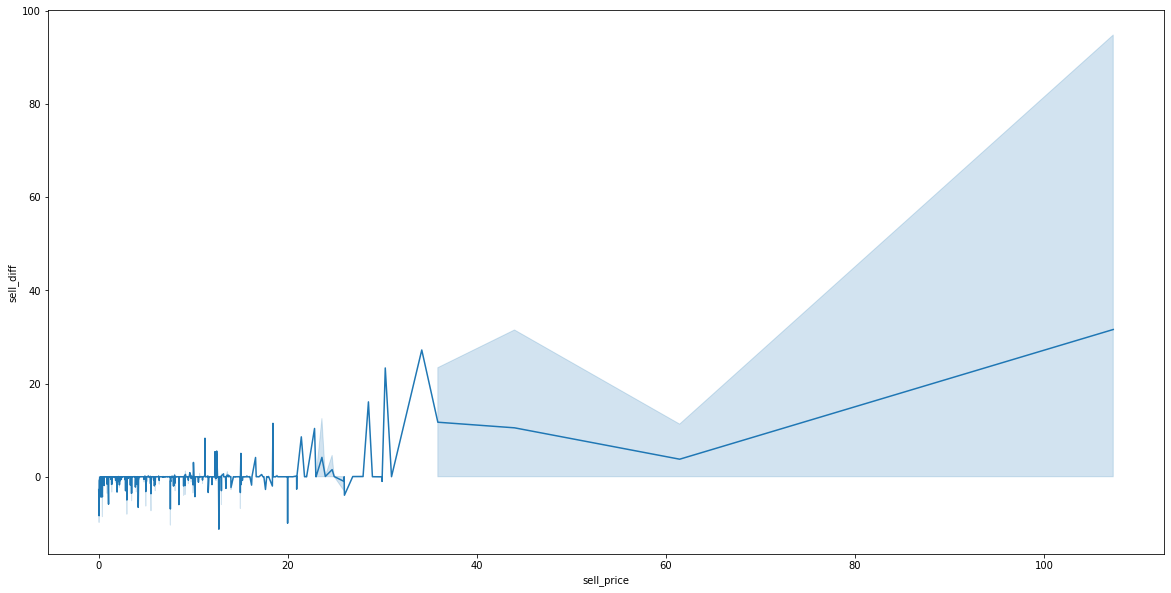

In [113]:
plt.figure(figsize = (20,10))
sns.lineplot(x = 'sell_price', y = 'sell_diff', data = WI_list)

## Conclusion WI:
* use week 11420- 11621 to train

In [114]:
# I will have 3 * 8 = 18 sets